In [1]:
import argparse
import pandas as pd
import numpy as np
from moltraffic.visualisations import *
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
from matplotlib.lines import Line2D

input_file = '../data/interim/minute_full.csv'

df = pd.read_csv(input_file)

In [2]:
#sdf

In [3]:
sdf = df[df['DIR'].str.startswith('Vozni pas       : Bravnicarjeva > Ulica Jožeta Jame (proti severozahodu)')]
sdf['SUM'] = sdf['Mot'] + sdf['Osebni'] + sdf['BUS'] + sdf['LTov'] + sdf['STov'] + sdf['TTov'] + sdf['TSP'] + sdf['Vlac']
sdf = sdf.drop(columns=['DIR', 'Err', 'Mot', 'Osebni', 'BUS', 'LTov', 'STov', 'TTov', 'TSP', 'GAP', 'VMIN', 'VAVG', 'VMAX', 'Vlac', 'SRC', 'OCC', 'NAME'])
#sdf = df
sdf


#df['DIR'].iloc[0]

/tmp/ipykernel_3128106/2149884200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['SUM'] = sdf['Mot'] + sdf['Osebni'] + sdf['BUS'] + sdf['LTov'] + sdf['STov'] + sdf['TTov'] + sdf['TSP'] + sdf['Vlac']


STM                 Time  SUM
0         1010-188  2016-03-01 00:00:00   23
2         1010-188  2016-03-01 00:15:00   18
4         1010-188  2016-03-01 00:30:00   15
6         1010-188  2016-03-01 00:45:00    8
8         1010-188  2016-03-01 01:00:00    7
...            ...                  ...  ...
21160254  1010-188  2016-11-30 22:45:00   49
21160256  1010-188  2016-11-30 23:00:00   37
21160258  1010-188  2016-11-30 23:15:00   41
21160260  1010-188  2016-11-30 23:30:00   32
21160262  1010-188  2016-11-30 23:45:00   19

[210300 rows x 3 columns]

In [4]:
#sdf.merge(sdf, how='cross')
sdf['Time'] = pd.to_datetime(sdf['Time'])
#sdf['Time_next'] = sdf['Time'] + pd.DateOffset(minutes=15)


sdf_1 = sdf.copy(deep=True)
#sdf_1['Time'] = pd.to_datetime(sdf_1['Time'] + pd.DateOffset(minutes=15))

In [5]:
#sdf.join(sdf_1, on='Time')
sdf = sdf.set_index('Time')

sdf

STM  SUM
Time                              
2016-03-01 00:00:00  1010-188   23
2016-03-01 00:15:00  1010-188   18
2016-03-01 00:30:00  1010-188   15
2016-03-01 00:45:00  1010-188    8
2016-03-01 01:00:00  1010-188    7
...                       ...  ...
2016-11-30 22:45:00  1010-188   49
2016-11-30 23:00:00  1010-188   37
2016-11-30 23:15:00  1010-188   41
2016-11-30 23:30:00  1010-188   32
2016-11-30 23:45:00  1010-188   19

[210300 rows x 2 columns]

In [6]:
sdf_1['Time'] = pd.to_datetime(sdf_1['Time'] + pd.DateOffset(minutes=15))
sdf_1 = sdf_1.set_index('Time')

sdf_1

STM  SUM
Time                              
2016-03-01 00:15:00  1010-188   23
2016-03-01 00:30:00  1010-188   18
2016-03-01 00:45:00  1010-188   15
2016-03-01 01:00:00  1010-188    8
2016-03-01 01:15:00  1010-188    7
...                       ...  ...
2016-11-30 23:00:00  1010-188   49
2016-11-30 23:15:00  1010-188   37
2016-11-30 23:30:00  1010-188   41
2016-11-30 23:45:00  1010-188   32
2016-12-01 00:00:00  1010-188   19

[210300 rows x 2 columns]

In [7]:
rdf = sdf.join(sdf_1, lsuffix='_a', rsuffix='_b')
rdf['beg'] = 60*rdf.index.hour + rdf.index.minute
rdf['end'] = 60*rdf.index.hour + rdf.index.minute + 15

In [8]:
X = rdf[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy()
X

array([[  23.,   18.,    0.,   15.],
       [  18.,   23.,   15.,   30.],
       [  15.,   18.,   30.,   45.],
       ...,
       [  41.,   37., 1395., 1410.],
       [  32.,   41., 1410., 1425.],
       [  19.,   32., 1425., 1440.]])

In [9]:
#for x in X:
#    t1, t2, beg, end = x[0], x[1], x[2], x[3]
#    plt.plot([max(beg, end), min(beg, end)], [t1, t2], alpha=0.005, color='blue')
#    
#plt.xlabel('Time')
#plt.ylabel('Vehicle count')
#plt.savefig('daily_traffic.pdf', bbox_inches='tight', pad_inches=0)

In [10]:
#np.random.randn(X.shape[0])

In [11]:
#import numpy as np

In [12]:
#X = rdf[['SUM_a', 'beg']].to_numpy()
#plt.scatter(X[:, 1]+5*np.random.randn(X.shape[0]), X[:, 0], alpha=0.005, s=1)

In [13]:
#D = rdf[['SUM_a', 'SUM_b', 'beg', 'end']]
#X_m = D.groupby(['beg', 'end']).mean().reset_index().to_numpy()
#
#for x in X_m:
#    beg, end, t1, t2 = x[0], x[1], x[2], x[3]
#    plt.plot([max(beg, end), min(beg, end)], [t1, t2], alpha=1, color='orange')

In [14]:
def plot_daily_traffic():
    lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
    lines = []

    X = rdf[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy()
    for x in X:
        t1, t2, beg, end = x[0], x[1], x[2], x[3]
        lines.append([(end, t1), (beg, t2)])

    c = np.array(len(lines)*[(0, 0, 1, 0.005)])

    lc = mc.LineCollection(lines, colors=c, linewidths=2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

    #D = rdf[['SUM_a', 'SUM_b', 'beg', 'end']]
    #X_m = D.groupby(['beg', 'end']).mean().reset_index()
    #
    #for x in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
    #    t1, t2, beg, end = x[0], x[1], x[2], x[3]
    #    plt.plot([end, beg], [t1, t2], alpha=1, color='orange')

    line_alpha = 1
    linewidth = 1.5

    D = rdf[['SUM_a', 'SUM_b', 'beg', 'end']]
    D = D[D.index.dayofweek<=4]
    X_m = D.groupby(['beg', 'end']).mean().reset_index()

    for x in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
        t1, t2, beg, end = x[0], x[1], x[2], x[3]
        plt.plot([end, beg], [t1, t2], alpha=line_alpha, linewidth=linewidth, color='orange')

    D = rdf[['SUM_a', 'SUM_b', 'beg', 'end']]
    D = D[D.index.dayofweek==5]
    X_m = D.groupby(['beg', 'end']).mean().reset_index()

    for x in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
        t1, t2, beg, end = x[0], x[1], x[2], x[3]
        plt.plot([end, beg], [t1, t2], alpha=line_alpha, linewidth=linewidth, color='red')

    D = rdf[['SUM_a', 'SUM_b', 'beg', 'end']]
    D = D[D.index.dayofweek==6]
    X_m = D.groupby(['beg', 'end']).mean().reset_index()

    for x in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
        t1, t2, beg, end = x[0], x[1], x[2], x[3]
        plt.plot([end, beg], [t1, t2], alpha=line_alpha, linewidth=linewidth, color='green')




    colors = ['orange', 'red', 'green']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
    labels = ['Weekdays', 'Saturday', 'Sunday']
    plt.legend(lines, labels)
    plt.ylabel('Number of vehicles')
    plt.xlabel('Time')

    x = [0, 6*60, 12*60, 18*60, 24*60]
    labels = ['0:00', '6:00', '12:00', '18:00', '24:00']

    plt.xticks(x, labels)#, rotation='vertical')
    
    return X, D

(array([[  23.,   18.,    0.,   15.],
        [  18.,   23.,   15.,   30.],
        [  15.,   18.,   30.,   45.],
        ...,
        [  41.,   37., 1395., 1410.],
        [  32.,   41., 1410., 1425.],
        [  19.,   32., 1425., 1440.]]),
                      SUM_a  SUM_b   beg   end
 Time                                         
 2016-03-06 00:00:00     32   31.0     0    15
 2016-03-06 00:15:00     32   32.0    15    30
 2016-03-06 00:30:00     35   32.0    30    45
 2016-03-06 00:45:00     23   35.0    45    60
 2016-03-06 01:00:00     24   23.0    60    75
 ...                    ...    ...   ...   ...
 2016-11-27 22:45:00     49   53.0  1365  1380
 2016-11-27 23:00:00     41   49.0  1380  1395
 2016-11-27 23:15:00     31   41.0  1395  1410
 2016-11-27 23:30:00     30   31.0  1410  1425
 2016-11-27 23:45:00     16   30.0  1425  1440
 
 [30048 rows x 4 columns])

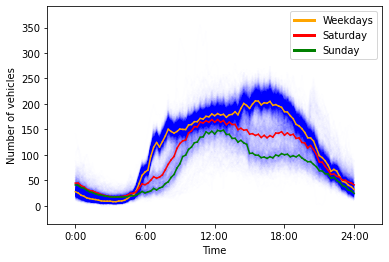

In [15]:
plot_daily_traffic()
#plt.savefig('daily_traffic.pdf', bbox_inches='tight', pad_inches=0)

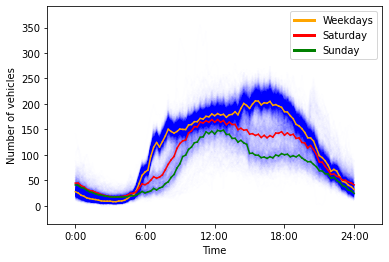

In [16]:
X_m, D = plot_daily_traffic()
#plt.savefig('daily_traffic.png', bbox_inches='tight', pad_inches=0)

In [17]:
x = []
y = []

for r in X_m:
    #print(r)
    big_v, end_v, big, end = r
    #print(big_v, end_v, big, end)
    
    xn = np.linspace(big_v, end_v, 10)
    x.extend(xn)
    
    yn = np.linspace(big, end, 10)
    y.extend(yn)


In [18]:
D = rdf[['SUM_a', 'SUM_b', 'beg', 'end']]

In [19]:
def renorm(x, y):
    nx = []
    ny = []

    import random
    random.uniform(0, 1)

    for x_, y_ in zip(x, y):
        if (x_+2)/40>random.uniform(0, 1):
            nx.append(x_)
            ny.append(y_)
    return nx, ny

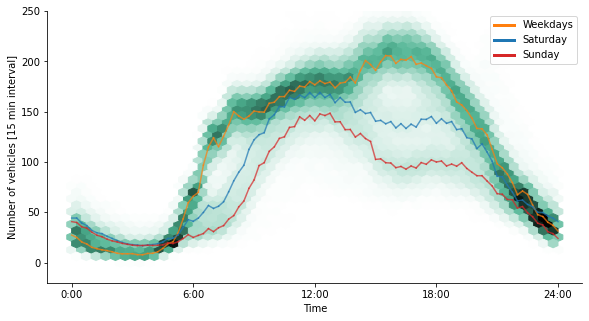

In [20]:
x, y = renorm(x, y)

g = sns.jointplot(x=y, y=x, kind="hex", color="#4CB391")
g.ax_marg_x.remove()
g.ax_marg_y.remove()

g.fig.set_size_inches(10, 5)

plt.ylim([-20, 250])

X_m = D[D.index.dayofweek<=4].groupby(['beg', 'end']).mean().reset_index()
for x1 in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
    t1, t2, beg, end = x1[0], x1[1], x1[2], x1[3]
    plt.plot([end, beg], [t1, t2], alpha=0.7, linewidth=1.5, color='tab:orange')
    
    
X_m = D[D.index.dayofweek==5].groupby(['beg', 'end']).mean().reset_index()
for x1 in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
    t1, t2, beg, end = x1[0], x1[1], x1[2], x1[3]
    plt.plot([end, beg], [t1, t2], alpha=0.7, linewidth=1.5, color='tab:blue')
    

X_m = D[D.index.dayofweek==6].groupby(['beg', 'end']).mean().reset_index()
for x1 in X_m[['SUM_a', 'SUM_b', 'beg', 'end']].to_numpy():
    t1, t2, beg, end = x1[0], x1[1], x1[2], x1[3]
    plt.plot([end, beg], [t1, t2], alpha=0.7, linewidth=1.5, color='tab:red')
    
colors = ['tab:orange', 'tab:blue', 'tab:red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Weekdays', 'Saturday', 'Sunday']
plt.legend(lines, labels)
plt.ylabel('Number of vehicles [15 min interval]')
plt.xlabel('Time')

labels_poz = [0, 6*60, 12*60, 18*60, 24*60]
labels = ['0:00', '6:00', '12:00', '18:00', '24:00']

plt.xticks(labels_poz, labels)#, rotation='vertical')

plt.savefig('daily_traffic.pdf', bbox_inches='tight', pad_inches=0)

In [21]:
#max(y)

In [22]:
#import matplotlib
#norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
#sns.jointplot(x=ny, y=nx, kind="hex", color="#4CB391")

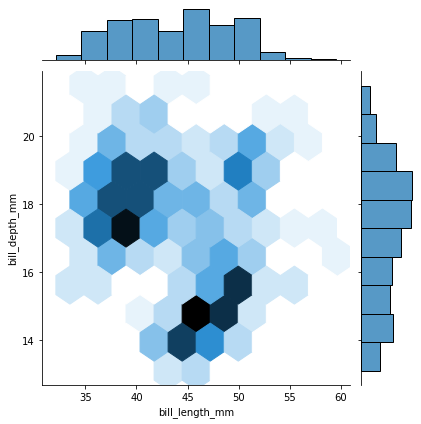

In [23]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex", hue_norm=(-1, 2))